In [18]:
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import cm
from matplotlib.colors import Normalize

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
data_name = ['2M_0.02.txt','30M_0.02.txt']

col_names = ['Step','t','M','LogL','LogR',
                 'LogTs','LogTc','Logrhoc','logPc','psic',
                 'Xc','Yc','XCc','XNc','XOc',
                 'taudyn','tauKH','taunuc','Lpp','LCNO',
                 'L3a','LZ','Lv','MHe','MC',
                 'MO','RHe','RC','RO']
    

col_names_structure = ['Mr','r','Lr','P','rho',
                 'T','U','S','Cp','adia1',
                 'nablaad','mu','ne','Pe','Pr',
                 'nablarad','nabla','vc','kappa','epsnuc',
                 'epspp','epscno','eps3alpha','epsvnuc','epsv', 'epsgrav',
                 'X','-','X+','Y', 'Y+', 'Y++', 'XC', 'XN', 'XO', 'Psi']

### 3.1 Radial and temporal dependence of stellar properties

#### Stellar surface and stellar core

C:\Users\amirt\AppData\Local\Temp\ipykernel_8236\1508000799.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)


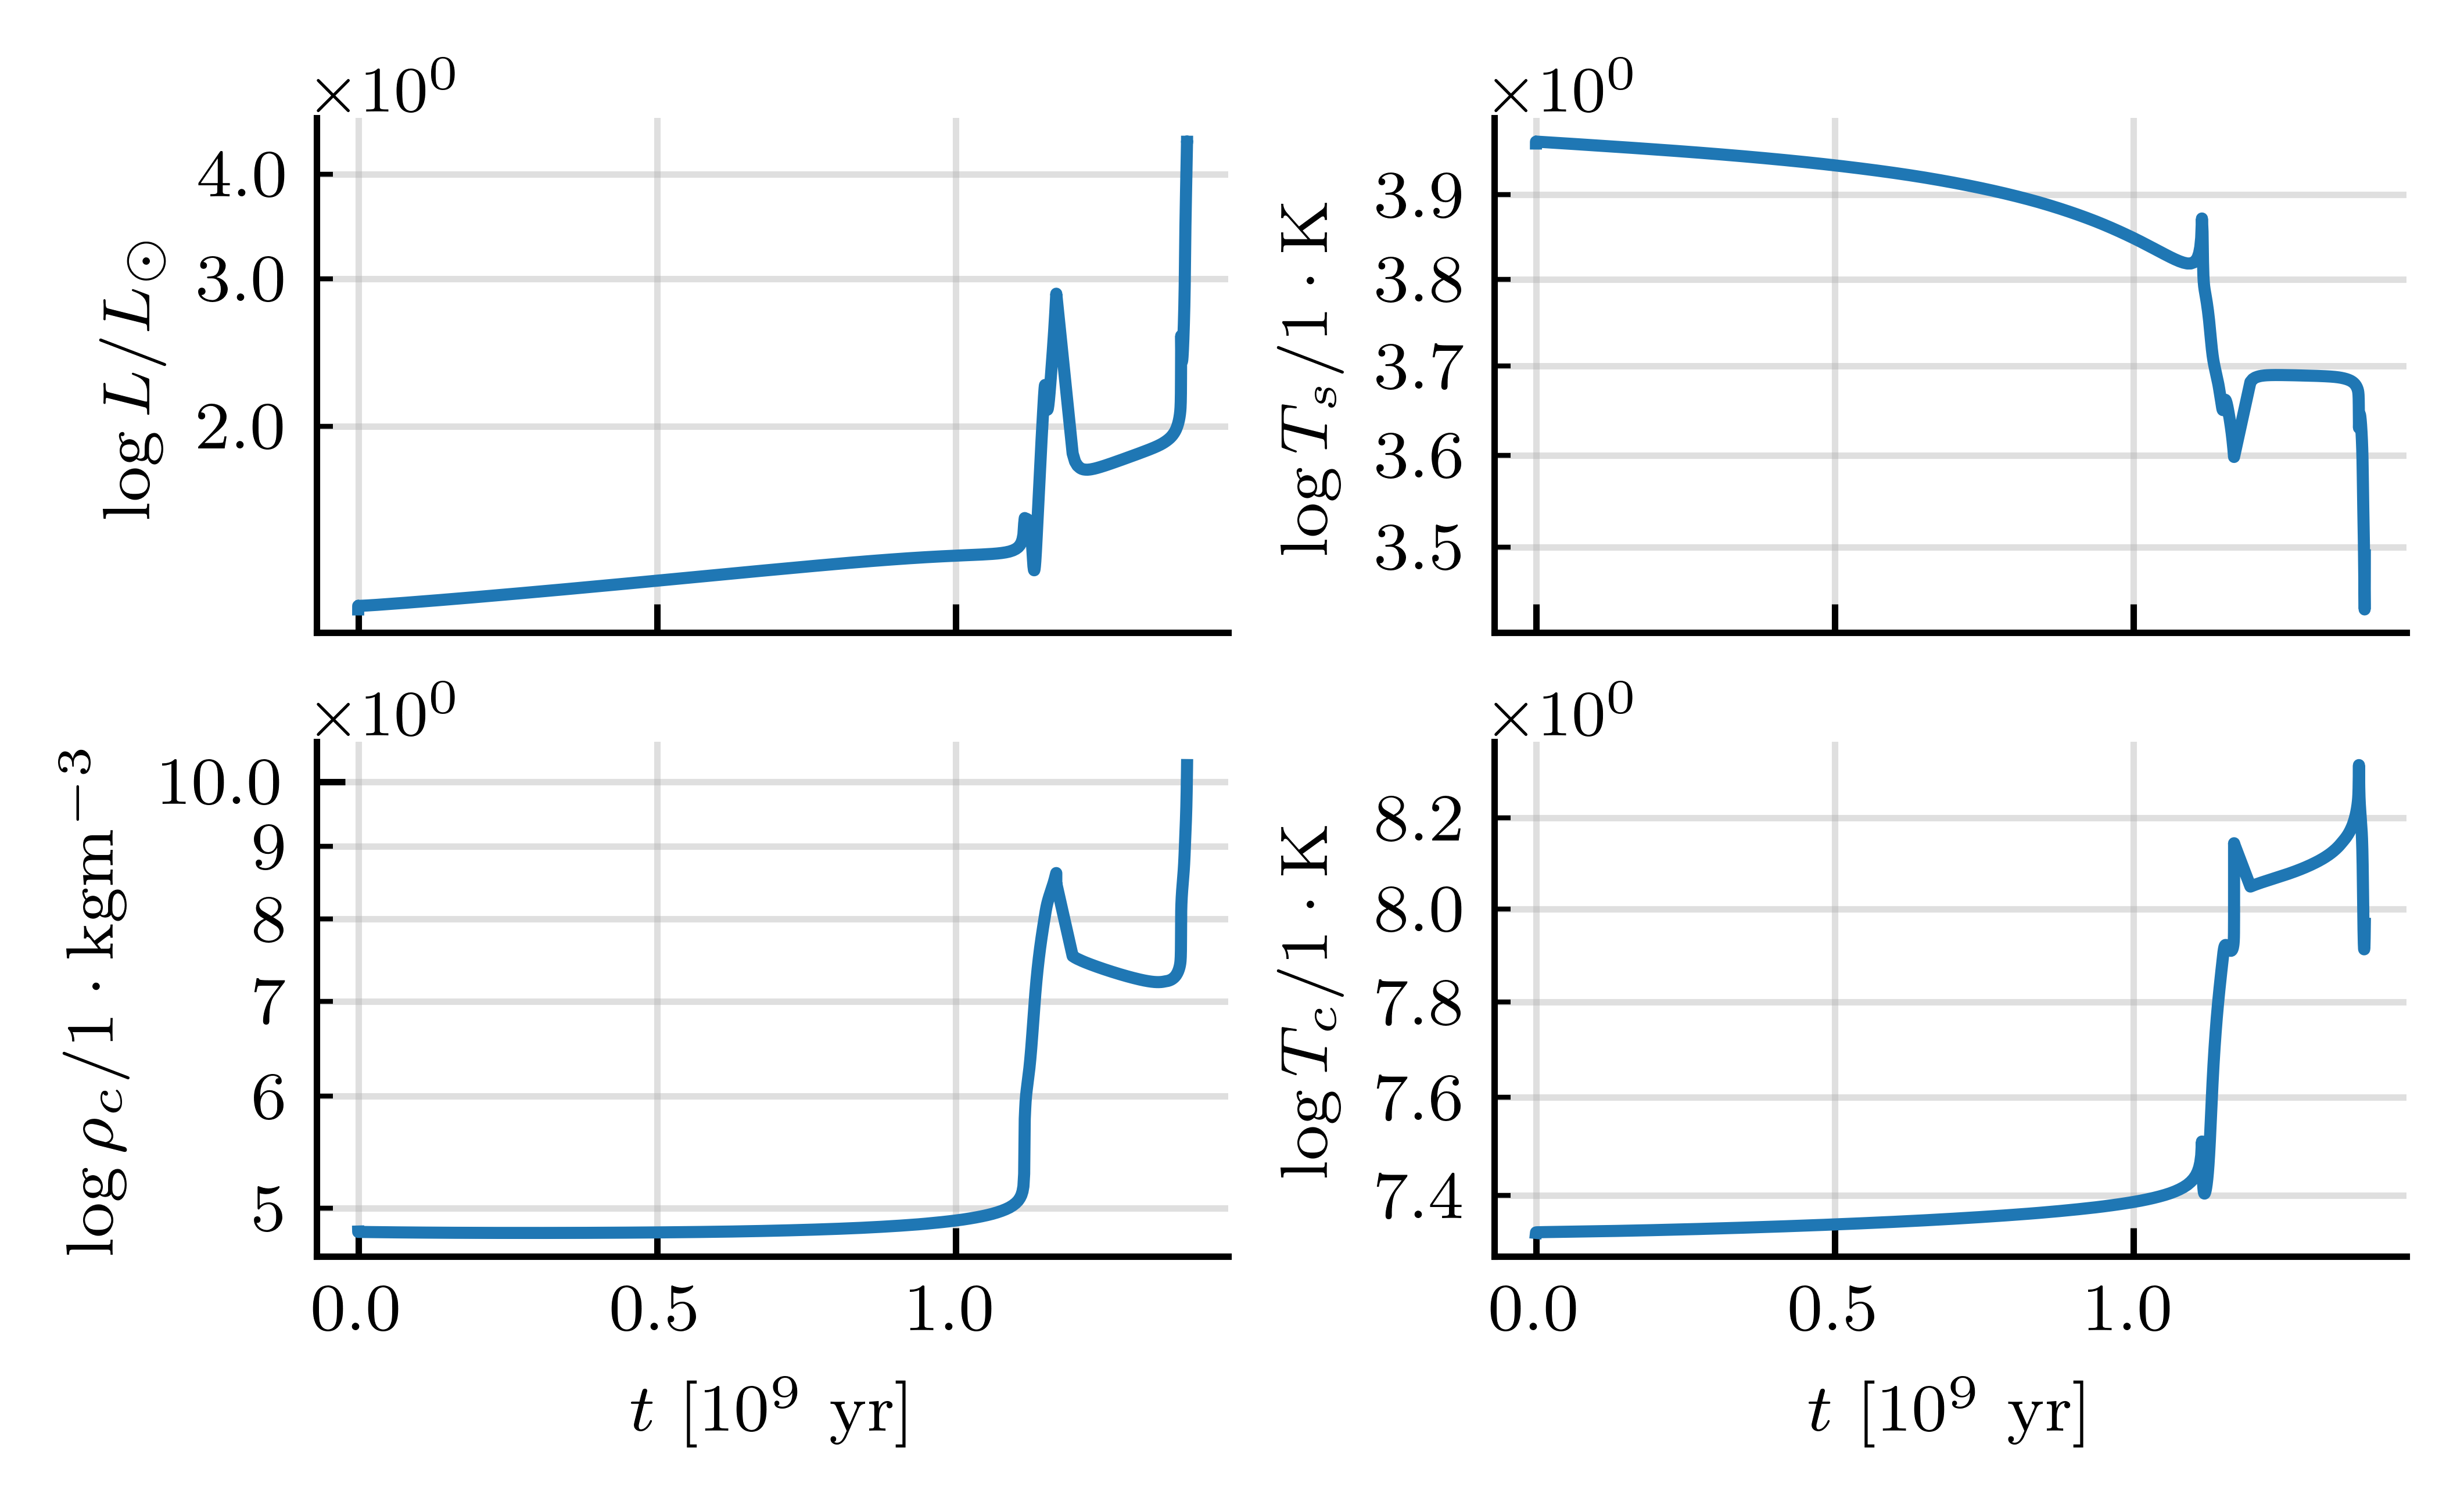

C:\Users\amirt\AppData\Local\Temp\ipykernel_8236\1508000799.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)


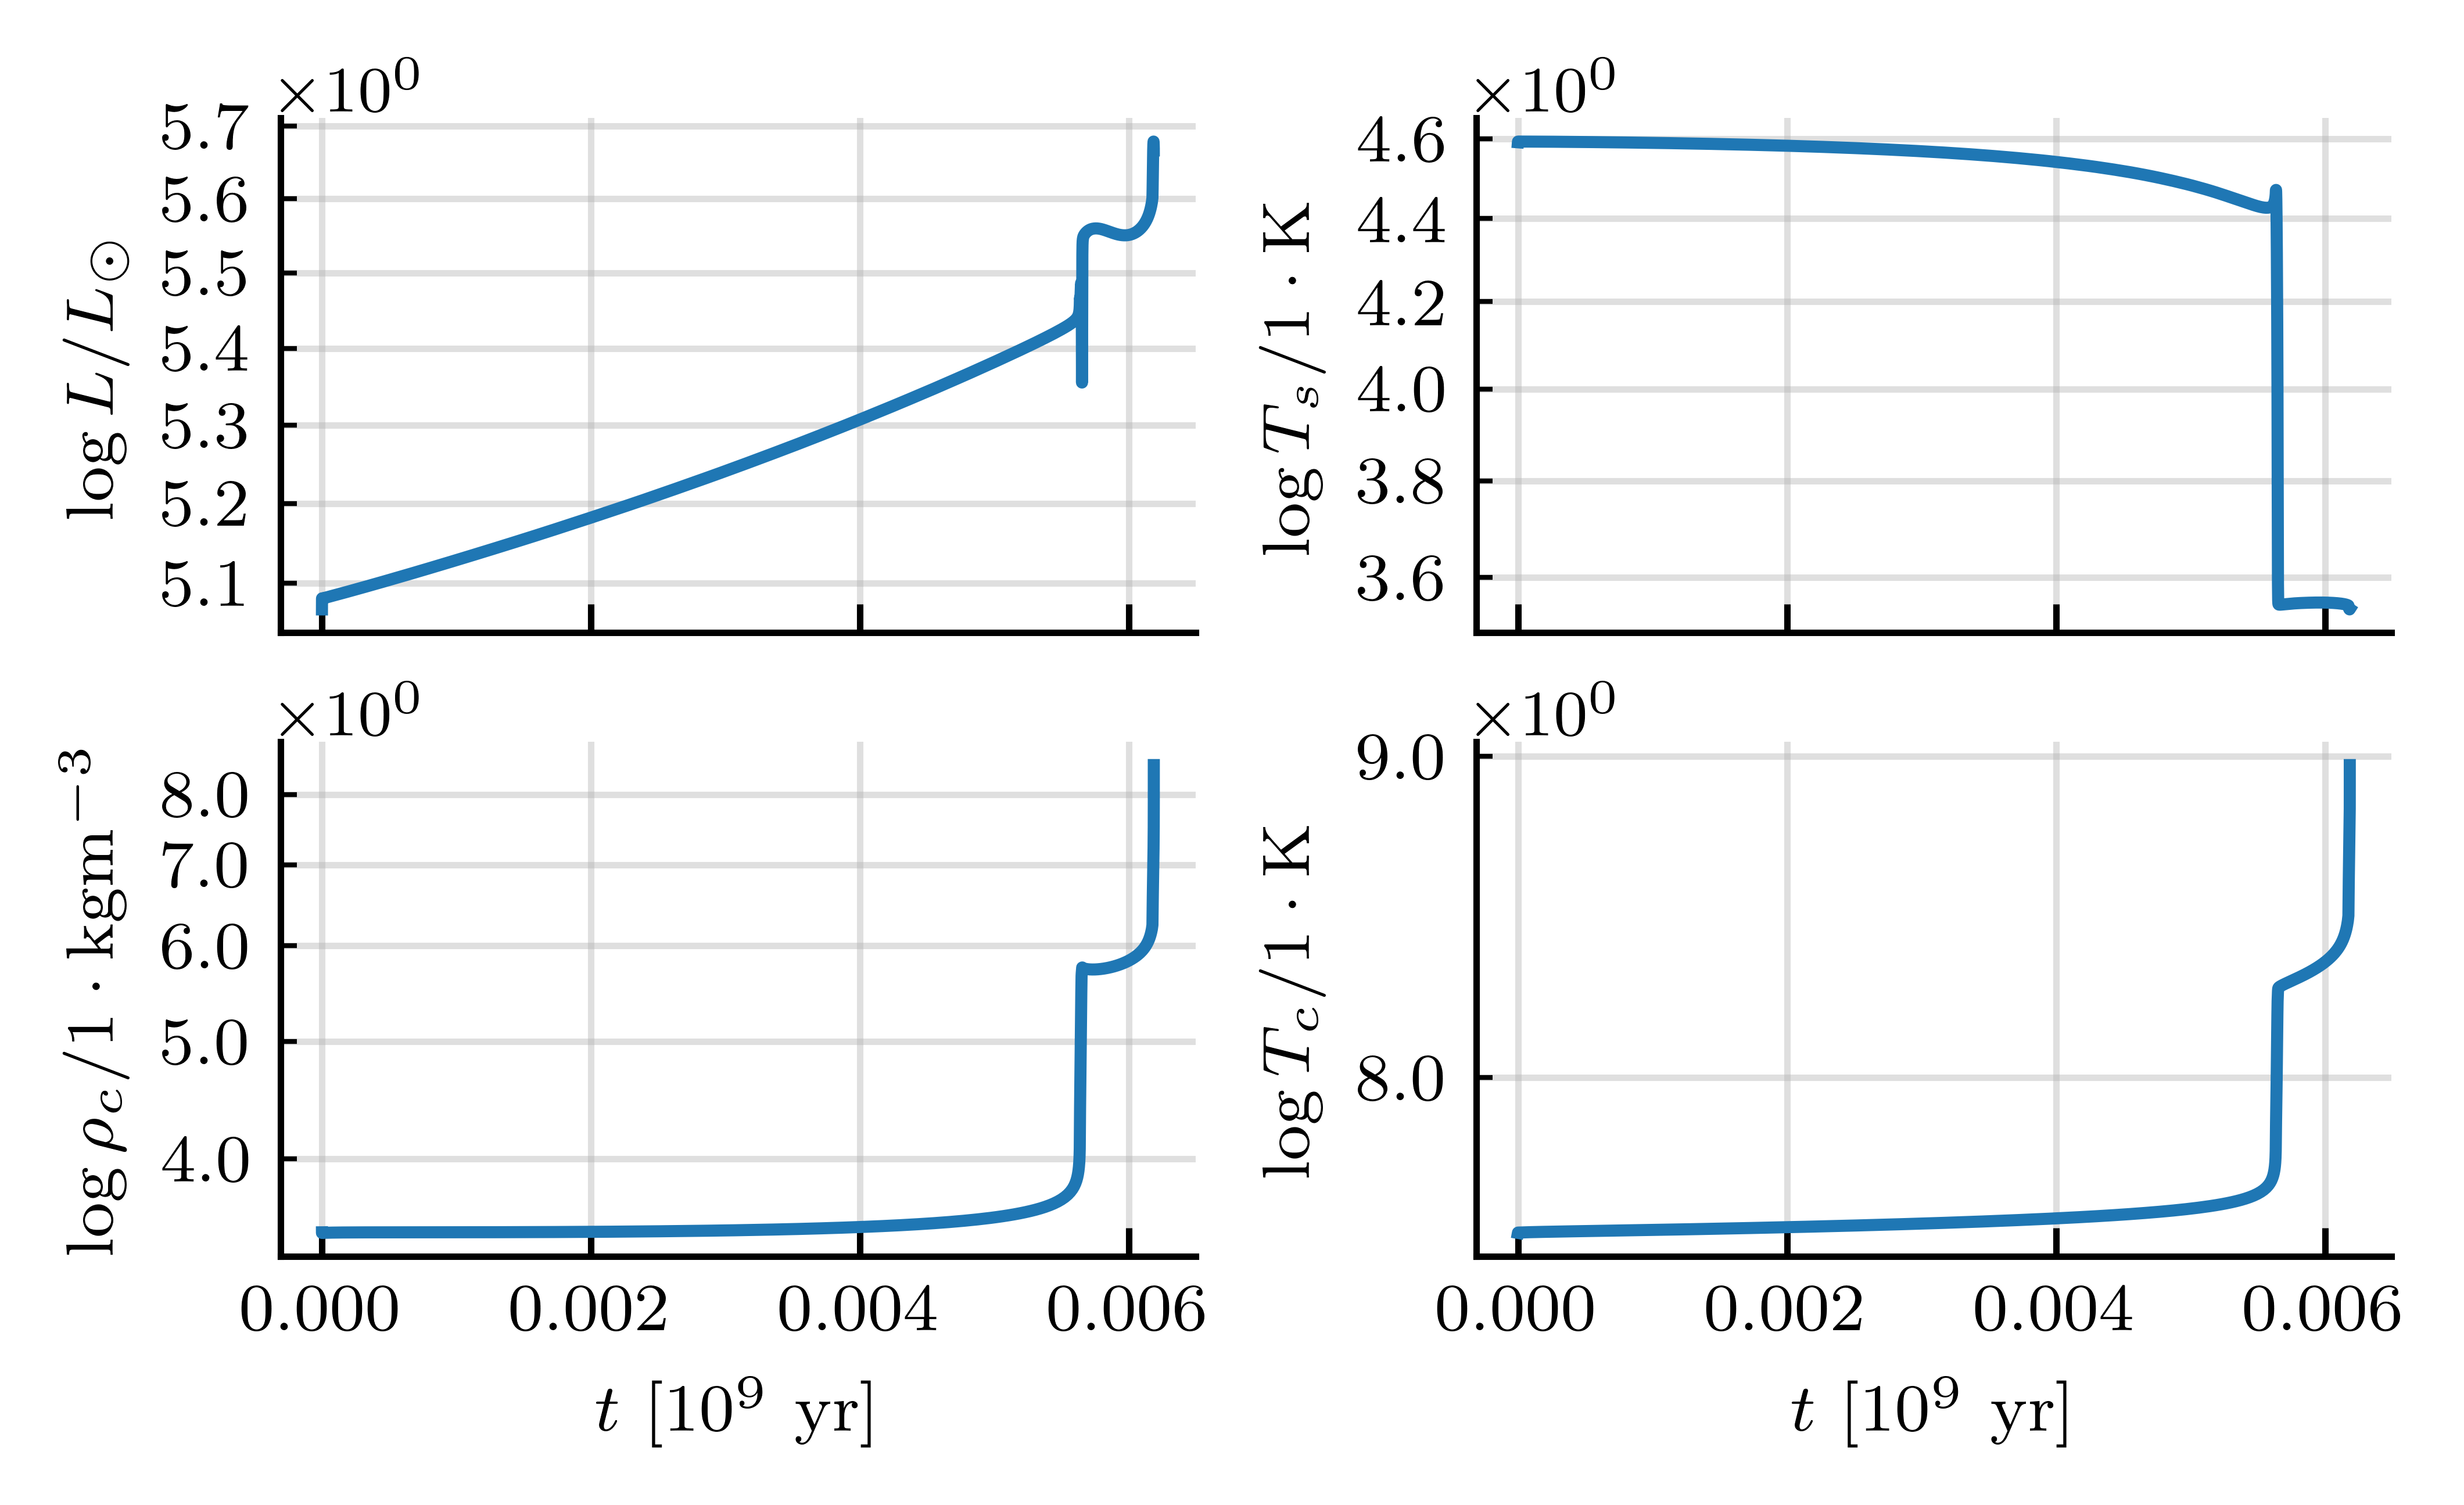

In [19]:
def plot_data(data_files, data_dir='Data/'):
    for data_name in data_files:
        fig, axs = plt.subplots(2, 2, sharex=True)
        df = pd.read_csv(data_dir + data_name, delim_whitespace=True, header=None)
        df.columns = col_names
        df.drop(columns=['Step'], inplace=True)

        
        axs[0, 0].semilogy(df['t'] / 1e9, df['LogL'])
        axs[0, 0].set_ylabel(r"$\log L/L_\odot$")
        
        axs[0, 1].semilogy(df['t'] / 1e9, df['LogTs'])
        axs[0, 1].set_ylabel(r"$\log T_s / 1 \cdot \mathrm{K}$")
        
        axs[1, 0].semilogy(df['t'] / 1e9, df['Logrhoc'])
        axs[1, 0].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        axs[1, 0].set_ylabel(r"$\log \rho_c / \mathrm{1 \cdot kg m^{-3}}$")
        
        axs[1, 1].semilogy(df['t'] / 1e9, df['LogTc'])
        axs[1, 1].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
        axs[1, 1].set_ylabel(r"$\log T_c/ 1 \cdot \mathrm{K}$")
        
        for ax in axs.flat:
            ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.text(0.0, 1.0, r'$\times \mathrm{10^{0}}$', transform=ax.transAxes,
                    horizontalalignment='left', verticalalignment='bottom', fontsize=8)
            ax.grid(which='both', alpha=0.4, visible=True)
        plt.show()

plot_data(data_name)


C:\Users\amirt\AppData\Local\Temp\ipykernel_8236\3923151164.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(current_dir+'.txt',
C:\Users\amirt\AppData\Local\Temp\ipykernel_8236\3923151164.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_struc = pd.read_csv(current_dir+f'structure_{idx:05d}.txt',


FileNotFoundError: [Errno 2] No such file or directory: 'Data/2M_0.02structure_00000.txt'

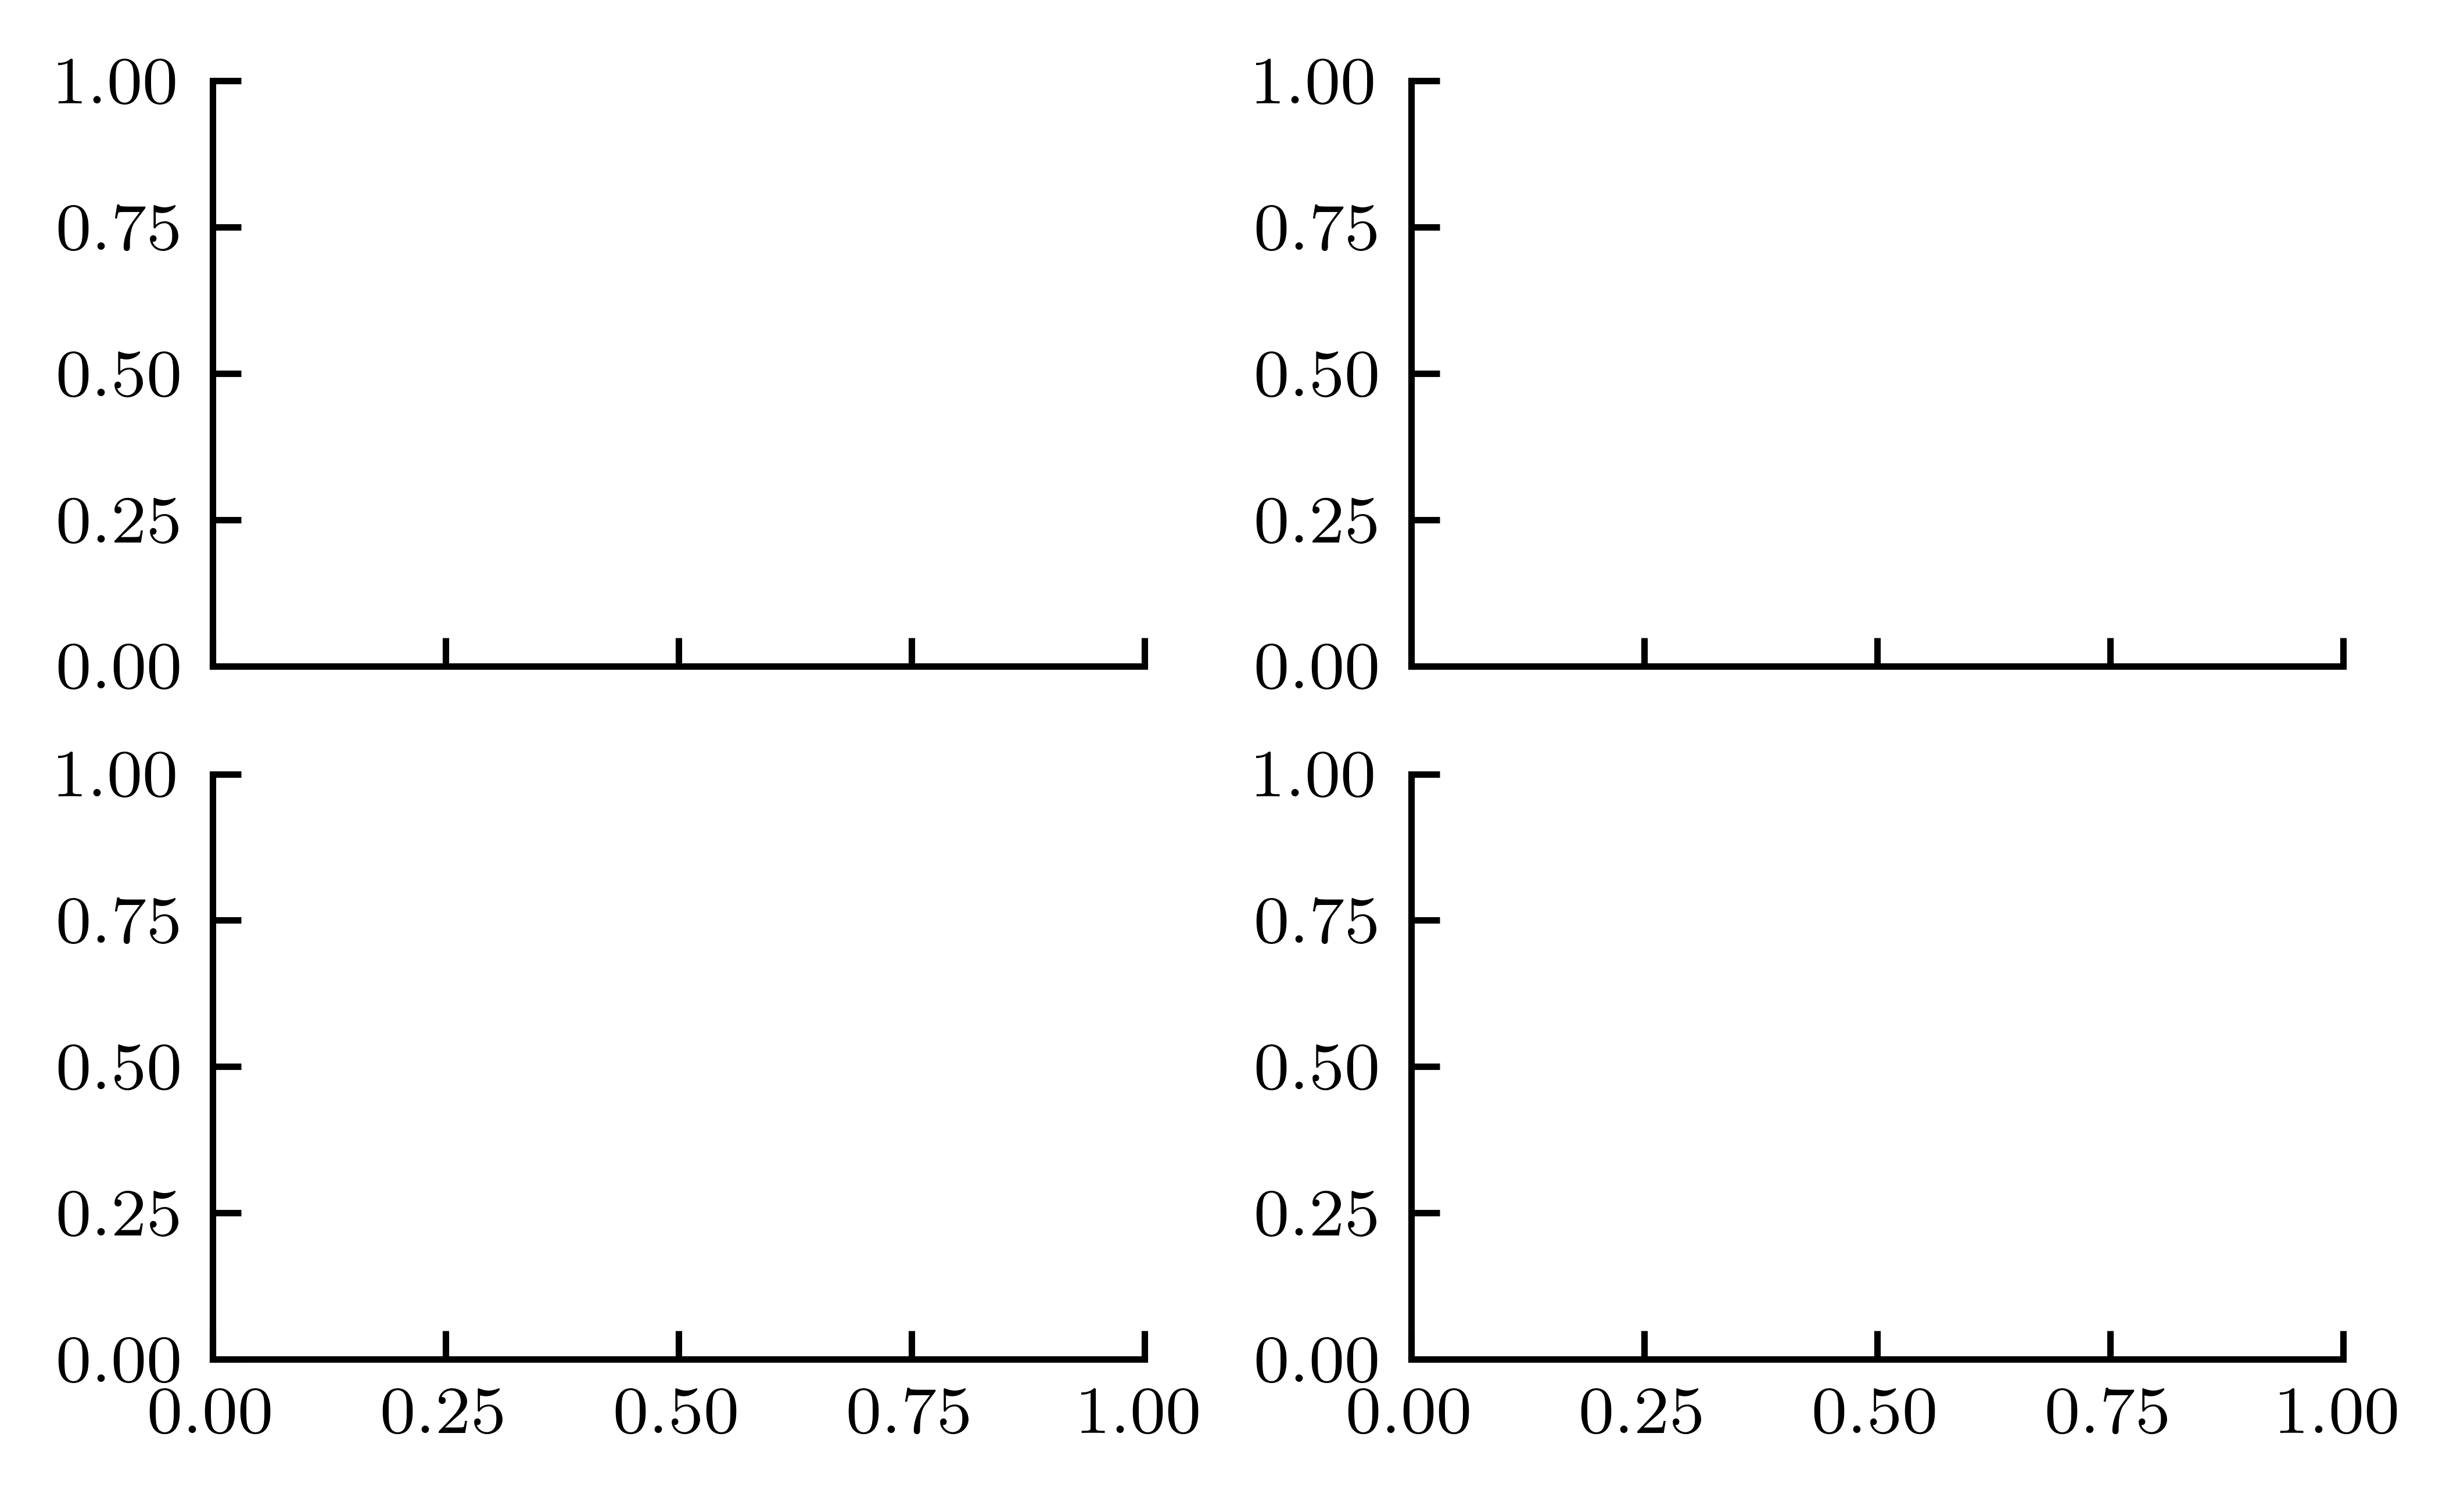

In [22]:
# R vs Tc, Ts, rhoc, L
def plot_data(masses,metals,time_frac):

    for i,metal in enumerate(metals):
        
        for j,mass in enumerate(masses):
            fig, axs = plt.subplots(2, 2, sharex=True)
            cmap = cm.copper
            norm = Normalize(vmin=0, vmax=1)
            
            # Import summary.txt
            current_dir = DATA_DIR+f'{mass:.3g}M_{metal:.3g}/'
            df = pd.read_csv(current_dir+'summary.txt', 
                             delim_whitespace=True, header=None)
            df.columns = col_names

            # Find indices closest to given time fractions
            time_frac_idx = [np.argmin(np.abs(df['t'] - (t*np.max(df['t']))))
                             for t in time_frac]
            
            for k,idx in enumerate(time_frac_idx):
                df_struc = pd.read_csv(current_dir+f'structure_{idx:05d}.txt',
                                       delim_whitespace=True, header=None)
                df_struc.columns = col_names_structure    
                r = df_struc['r']
                
                color = cmap(norm(time_frac[k]))
                
                axs[0, 0].loglog(r, df_struc['Lr'], color = color)
                axs[0, 0].set_ylabel(r"$L_r/L_\odot$")
                
                axs[0, 1].loglog(r, df_struc['T'], color = color)
                axs[0, 1].set_ylabel(r"$T / 1 \cdot \mathrm{K}$")
                
                axs[1, 0].loglog(r, df_struc['rho'], color = color)
                axs[1, 0].set_xlabel(r"$r/R_\odot$ [1]")
                axs[1, 0].set_ylabel(r"$\rho_r / \mathrm{1 \cdot kg m^{-3}}$")
                
                axs[1, 1].semilogx(r, df_struc['X'], color = color)
                axs[1, 1].set_xlabel(r"$r/R_\odot$ [1]")
                axs[1, 1].set_ylabel(r"$X$ [1]")
            
        
            cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
            cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
            cbar.set_label(r'$t/t_\mathrm{end}$')

            #plt.savefig(f'2{mass:.3g}_interior.pdf')
            plt.show()

masses = [2,30]
metallicities=[0.02]
time_frac = [0,.50,.75,.90,1]

plot_data(masses, metallicities, time_frac)